In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

In [12]:
# Generate a synthetic dataset with 300 samples and 2 features
data = make_blobs(n_samples=300, centers=4, n_features=2, random_state=42)
# Standardize the dataset
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[0])

In [13]:
def initialize_centroids(data, k):
    # Initialize centroids as k random samples from data
    centroids = data.copy()
    np.random.shuffle(centroids)
    return centroids[:k]

def compute_distances(data, centroids):
    # Compute distances between each data point and the set of centroids
    distances = np.zeros((data.shape[0], centroids.shape[0]))
    for i, centroid in enumerate(centroids):
        distances[:, i] = np.linalg.norm(data - centroid, axis=1)
    return distances

In [14]:
def assign_clusters(distances):
    # Assign each data point to the closest centroid
    return np.argmin(distances, axis=1)

def update_centroids(data, clusters, k):
    # Compute means of data points within each cluster
    centroids = np.zeros((k, data.shape[1]))
    for i in range(k):
        centroids[i, :] = np.mean(data[clusters == i, :], axis=0)
    return centroids

def k_means(data, k, max_iterations=100):
    centroids = initialize_centroids(data, k)
    for i in range(max_iterations):
        distances = compute_distances(data, centroids)
        clusters = assign_clusters(distances)
        centroids = update_centroids(data, clusters, k)
    return centroids, clusters

In [15]:
# Choose the number of clusters, K
k = 4
# Run the K-means algorithm
centroids, clusters = k_means(data_scaled, k)
# Compute the total within-cluster sum of squares
wcss = np.sum([np.sum(np.square(data_scaled[clusters == i] -centroids[i])) for i in range(k)])
print("Total within-cluster sum of squares: ", wcss)

Total within-cluster sum of squares:  17.46619760906058


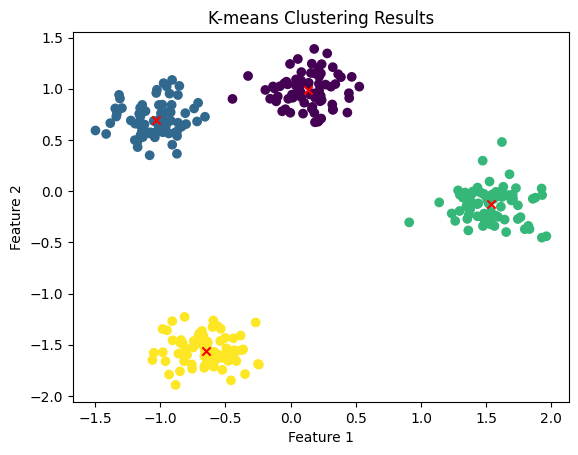

In [16]:
# Plot the dataset with the assigned clusters and centroids
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=clusters, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-means Clustering Results')
plt.show()

In [17]:
def initialize_medoids(data, k):
    # Randomly initialize k medoids
    medoids = data.copy()
    np.random.shuffle(medoids)
    return medoids[:k]
def compute_dissimilarities(data, medoids):
    # Compute dissimilarity between each data point and the set of medoids
    dissimilarities = np.zeros((data.shape[0], medoids.shape[0]))
    for i, medoid in enumerate(medoids):
        dissimilarities[:, i] = np.linalg.norm(data - medoid, axis=1)
    return dissimilarities

In [18]:
# Your implementation here
def assign_clusters(dissimilarities):
    # Assign each data point to the cluster of the closest medoid
    return np.argmin(dissimilarities, axis=1)
def update_medoids(data, clusters, k):
    # Compute medoids as the median of each cluster
    medoids = np.zeros((k, data.shape[1]))
    for i in range(k):
        medoids[i, :] = np.median(data[clusters == i, :], axis=0)
    return medoids
def k_medoids(data, k, max_iterations=100):
    medoids = initialize_medoids(data, k)
    for i in range(max_iterations):
        dissimilarities = compute_dissimilarities(data, medoids)
        clusters = assign_clusters(dissimilarities)
        medoids = update_medoids(data, clusters, k)
    return medoids, clusters

In [19]:
k = 8
medoids, clusters = k_medoids(data_scaled, k)
mcss = np.sum([np.sum(np.square(data_scaled[clusters == i] -
medoids[i])) for i in range(k)])
print("Total within-cluster sum of squares: ", mcss)

Total within-cluster sum of squares:  12.1725843683531


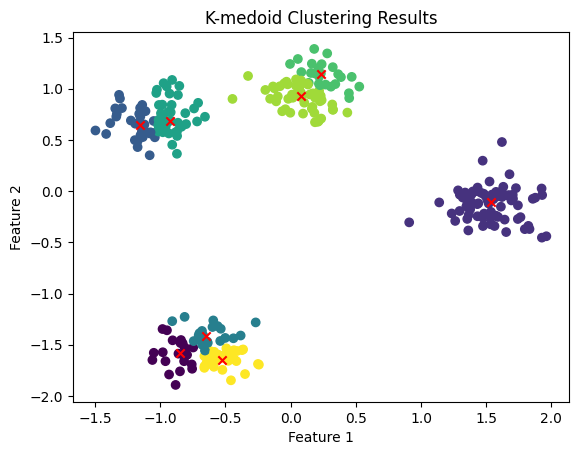

In [20]:
# Plot the dataset with the assigned clusters and centroids
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=clusters, cmap='viridis')
plt.scatter(medoids[:, 0], medoids[:, 1], c='red', marker='x')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-medoid Clustering Results')
plt.show()